In [10]:
%matplotlib inline

from math import erf, factorial 
import torch as t
from IPython import display 
import matplotlib.pyplot as plt



Bernoulli (Coin flips)
Random Variable X ~ Bernoulli(p)

Text(0.5, 1.0, 'CDF of Bernoulli distribution with p=.3')

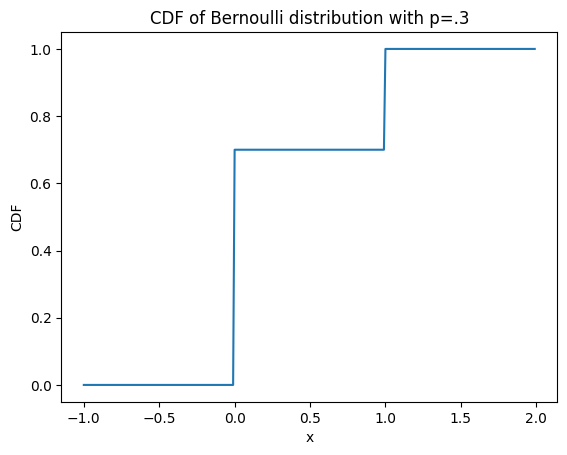

In [6]:
### CDF for Bernoulli distribution

def Bernoulli_cdf(x,p):
    if x < 0:
        return 0
    elif x >=0 and x<1:
        return 1-p
    else:
        return 1

p = 0.3
x = t.arange(-1,2,0.01)
cdf_B = [Bernoulli_cdf(x[j],p) for j in range(len(x))]
plt.plot(x, cdf_B)
plt.xlabel("x")
plt.ylabel("CDF")
plt.title("CDF of Bernoulli distribution with p=.3")


/var/folders/yj/gj5_5c_j1399_7h47zvzddtc0000gn/T/ipykernel_56157/129133334.py:1: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem([0,1], [1-p,p], use_line_collection=True)


Text(0.5, 1.0, 'PMF of Bernoulli distribution with p=.3')

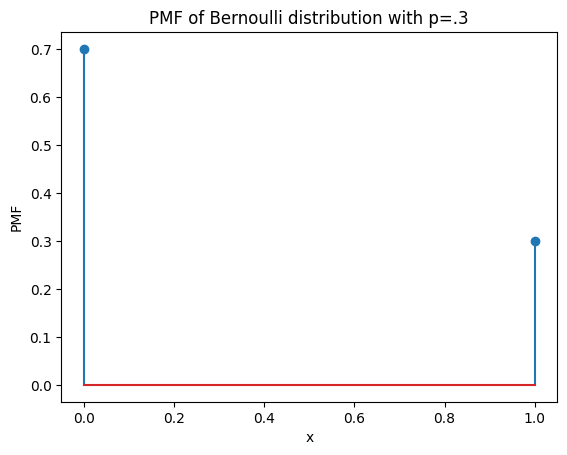

In [7]:
plt.stem([0,1], [1-p,p], use_line_collection=True)
plt.xlabel("x")
plt.ylabel("PMF")
plt.title("PMF of Bernoulli distribution with p=.3")

In [9]:
## Sample from a Bernoulli dist (0s and 1s) by:
sample_Bern = 1*(t.rand(5,5) <p)
sample_Bern

tensor([[0, 0, 0, 1, 1],
        [0, 0, 1, 0, 0],
        [0, 0, 1, 1, 0],
        [1, 1, 0, 0, 1],
        [0, 0, 0, 1, 0]])

Uniform Distribution - Discrete 

/var/folders/yj/gj5_5c_j1399_7h47zvzddtc0000gn/T/ipykernel_56157/3909724183.py:13: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(1,n+1), n*[1/n], use_line_collection=True)


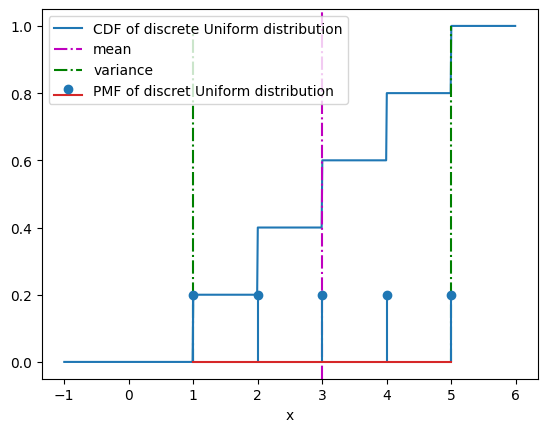

In [60]:
n= 5
p = 1/n
x = t.arange(-1,n+1,.01)
mu = (n+1)/2
sig = (n**2 - 1)/12
def cdf_U(x):
    return 0 if x<1 else 1 if x>n else t.floor(x)/n 
plt.plot(x, t.tensor([cdf_U(y) for y in x]))
plt.xlabel("x")
plt.axvline(mu, color = 'm', ls = '-.')
plt.vlines((mu-sig, mu+sig), 0, 1, colors = "g", ls = "-.")
#plt.axvline(sig, color = 'g', ls = '--')
plt.stem(range(1,n+1), n*[1/n], use_line_collection=True)
plt.xlabel("x")
plt.legend(["CDF of discrete Uniform distribution",'mean', 'variance',"PMF of discret Uniform distribution"])

Uniform Random Variable - Continuous

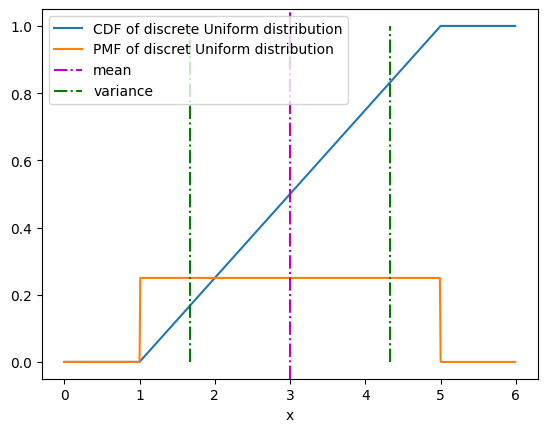

In [66]:
a, b = 1,5

def CDF_Uc(x):
    return 0 if x<a else 1 if x>=b else (x-a)/(b-a)
x = t.arange(0,6,0.01)
plt.plot(x,t.tensor([CDF_Uc(y) for y in x]))
plt.xlabel("x")
## way of taking an interval between two points 
plt.plot(x,((x>a).type(t.float32)*(x<b).type(t.float32))/(b-a))
plt.axvline((b+a)/2, color = 'm', ls = '-.')
plt.vlines(((b+a)/2-((b-a)**2)/12, (b+a)/2+((b-a)**2)/12), 0, 1, colors = "g", ls = "-.")
plt.legend(["CDF of discrete Uniform distribution","PMF of discret Uniform distribution",'mean', 'variance'])


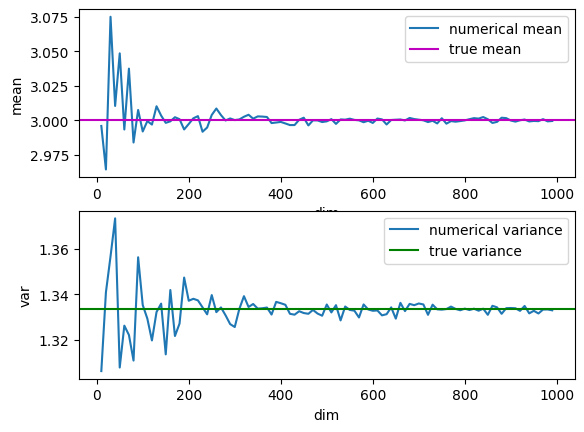

In [99]:

## Sampling from a uniform distribution: 

def sample_uniform(num):
    return ((b-a) * t.rand(num,num)+a)
_, ax = plt.subplots(2,1)
ax[0].plot(range(0,1000,10),[t.mean(sample_uniform(num)) for num in range(0,1000,10)])
ax[0].axhline((b+a)/2, color = "m")
ax[0].set(xlabel="dim", ylabel="mean")
ax[0].legend(["numerical mean", "true mean"])
ax[1].plot(range(0,1000,10),[t.var(sample_uniform(num)) for num in range(0,1000,10)])
ax[1].axhline(((b-a)**2)/12, color = "g")
ax[1].set(xlabel="dim", ylabel="var")
ax[1].legend(["numerical variance", "true variance"])



In [1]:
## define the normal distribution (already done in pytorch)

def normal(x, mu, sig):
    norm = 1/np.sqrt(2*t.pi*sig**2)
    p = norm * np.exp(-1/(2*sig**2)*(x - mu)**2)
    return p

x = t.arange(-7,7,0.01)

musigs = [(0,1,'-'), (0,2, 'm--'), (3,1, 'g-.')]
# plt.plot(x,)
#ps = [normal(x,musig[0], musig[1]).numpy() for musig in musigs]
#plt.plot(x.numpy(),ps)
for musig in musigs:
    plt.plot(x, normal(x,musig[0], musig[1]), musig[2])
plt.legend([f'mu = {musig[0]}, sigma = {musig[1]}' for musig in musigs])
plt.xlabel('x')
plt.ylabel('p(x)')

NameError: name 't' is not defined

In [2]:
x_2 = np.arange(-5,5)
plt.plot(x_2,np.abs(x_2))

NameError: name 'np' is not defined

In [ ]:
## poisson distribution

def poisson(events, rate):
    p = rate**events * np.exp(-rate)/math.factorial(events)
    return p

def poisson_loss(actual, estimated):
    loss = actual * estimated - np.exp(estimated)
    return loss

events = np.arange(0,10)
rates = [.01,.1,.5,.75,1]
for rate in rates:
    plt.plot([poisson(event,rate) for event in events])
plt.legend([f'rate = {rate}' for rate in rates])

x


In [ ]:
### softmax 
o = t.arange(-5,5,.01)
soft = t.exp(o)/t.sum(t.exp(o))
plt.plot(o,soft)
print(t.var(soft))
soft_loss = -t.sum()